In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

In [20]:
df = pd.read_csv('Results/tune_results_0.15.csv')
print(df.head())

   epsilon_0  noise  mean tune error  std tune error
0      0.003      1         0.060187        0.018327
1      0.003      2         0.044280        0.008501
2      0.003      3         0.081253        0.013062
3      0.005      1         0.030531        0.003970
4      0.005      2         0.113228        0.007215


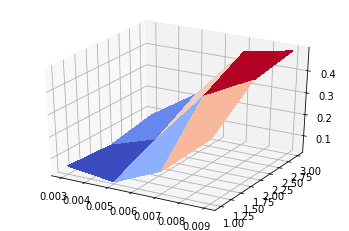

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
eps0 = df['epsilon_0'].values
noise = df['noise'].values
error = df['mean tune error'].values

Z_map = {}

for i, (e,n) in enumerate(zip(eps0, noise)):
    if e not in Z_map:
        Z_map[e] = {}
    Z_map[e][n] = error[i]

eps0 = np.unique(eps0)
noise = np.unique(noise)
X, Y = np.meshgrid(eps0, noise)
Z = np.array([ [ Z_map[e][n] for e in eps0]  for n in noise])
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()